using resnet101v2

reference from "cat and dog 009"

cross validation and fine tuning

fine tuning from model "cat and dog 009"

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import mixed_precision
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
#policy = mixed_precision.Policy('mixed_float16')
#mixed_precision.set_global_policy(policy)

In [2]:
data_folder = 'F:/data-extract/dogs-vs-cats/'
data_path = 'F:/data-extract/dogs-vs-cats/train/'
test_path = 'F:/data-extract/dogs-vs-cats/test/test1/'
image_size = (224, 224)
batch_size = 32
seed_number = 53
epochs = 8
file_version_num = '009a'
model_file1 = 'cat and dog 009-1.h5'
model_file2 = 'cat and dog 009-2.h5'
model_file3 = 'cat and dog 009-3.h5'
model_file4 = 'cat and dog 009-4.h5'
model_file5 = 'cat and dog 009-5.h5'
model_file_tune1 = 'cat and dog ' + file_version_num + '-1-t.h5'
model_file_tune2 = 'cat and dog ' + file_version_num + '-2-t.h5'
model_file_tune3 = 'cat and dog ' + file_version_num + '-3-t.h5'
model_file_tune4 = 'cat and dog ' + file_version_num + '-4-t.h5'
model_file_tune5 = 'cat and dog ' + file_version_num + '-5-t.h5'

In [4]:
df = pd.read_csv(data_folder + "dogcat.csv")
df['label'] = df['label'].astype(str)
# shuffle the DataFrame rows
#df = df.sample(frac = 1)

In [5]:
dfcat = df[df['label']=='0']
dfdog = df[df['label']=='1']
dfcat = dfcat.sample(frac = 1, random_state=seed_number)
dfdog = dfdog.sample(frac = 1, random_state=seed_number)

In [6]:
#cat
dfcat1train = dfcat.iloc[:10000]
dfcat1val = dfcat.iloc[10000:]

dfcat2train = dfcat.iloc[np.r_[0:7500, 10000:12498]]
dfcat2val = dfcat.iloc[7500:10000]

dfcat3train = dfcat.iloc[np.r_[0:5000, 7500:12498]]
dfcat3val = dfcat.iloc[5000:7500]

dfcat4train = dfcat.iloc[np.r_[0:2500, 5000:12498]]
dfcat4val = dfcat.iloc[2500:5000]

dfcat5train = dfcat.iloc[2500:]
dfcat5val = dfcat.iloc[:2500]

#dog
dfdog1train = dfdog.iloc[:10000]
dfdog1val = dfdog.iloc[10000:]

dfdog2train = dfdog.iloc[np.r_[0:7500, 10000:12493]]
dfdog2val = dfdog.iloc[7500:10000]

dfdog3train = dfdog.iloc[np.r_[0:5000, 7500:12493]]
dfdog3val = dfdog.iloc[5000:7500]

dfdog4train = dfdog.iloc[np.r_[0:2500, 5000:12493]]
dfdog4val = dfdog.iloc[2500:5000]

dfdog5train = dfdog.iloc[2500:]
dfdog5val = dfdog.iloc[:2500]

#combine
df1train = pd.concat([dfcat1train, dfdog1train])
df1val = pd.concat([dfcat1val, dfdog1val])

df2train = pd.concat([dfcat2train, dfdog2train])
df2val = pd.concat([dfcat2val, dfdog2val])

df3train = pd.concat([dfcat3train, dfdog3train])
df3val = pd.concat([dfcat3val, dfdog3val])

df4train = pd.concat([dfcat4train, dfdog4train])
df4val = pd.concat([dfcat4val, dfdog4val])

df5train = pd.concat([dfcat5train, dfdog5train])
df5val = pd.concat([dfcat5val, dfdog5val])

#suffle
df1train = df1train.sample(frac = 1, random_state=seed_number)
df1val = df1val.sample(frac = 1, random_state=seed_number)

df2train = df2train.sample(frac = 1, random_state=seed_number)
df2val = df2val.sample(frac = 1, random_state=seed_number)

df3train = df3train.sample(frac = 1, random_state=seed_number)
df3val = df3val.sample(frac = 1, random_state=seed_number)

df4train = df4train.sample(frac = 1, random_state=seed_number)
df4val = df4val.sample(frac = 1, random_state=seed_number)

df5train = df5train.sample(frac = 1, random_state=seed_number)
df5val = df5val.sample(frac = 1, random_state=seed_number)

In [7]:
catdogDG = ImageDataGenerator()

train_ds1 = catdogDG.flow_from_dataframe(
    dataframe=df1train,
    directory=data_folder,
    x_col="filename",
    y_col="label",
    target_size=image_size,
    classes=None,
    class_mode="binary",
    batch_size=batch_size,
    shuffle=True,
    seed=seed_number,
    interpolation="nearest"
)

val_ds1 = catdogDG.flow_from_dataframe(
    dataframe=df1val,
    directory=data_folder,
    x_col="filename",
    y_col="label",
    target_size=image_size,
    classes=None,
    class_mode="binary",
    batch_size=batch_size,
    shuffle=True,
    seed=seed_number,
    interpolation="nearest"
)


train_ds2 = catdogDG.flow_from_dataframe(
    dataframe=df2train,
    directory=data_folder,
    x_col="filename",
    y_col="label",
    target_size=image_size,
    classes=None,
    class_mode="binary",
    batch_size=batch_size,
    shuffle=True,
    seed=seed_number,
    interpolation="nearest"
)

val_ds2 = catdogDG.flow_from_dataframe(
    dataframe=df2val,
    directory=data_folder,
    x_col="filename",
    y_col="label",
    target_size=image_size,
    classes=None,
    class_mode="binary",
    batch_size=batch_size,
    shuffle=True,
    seed=seed_number,
    interpolation="nearest"
)


train_ds3 = catdogDG.flow_from_dataframe(
    dataframe=df3train,
    directory=data_folder,
    x_col="filename",
    y_col="label",
    target_size=image_size,
    classes=None,
    class_mode="binary",
    batch_size=batch_size,
    shuffle=True,
    seed=seed_number,
    interpolation="nearest"
)

val_ds3 = catdogDG.flow_from_dataframe(
    dataframe=df3val,
    directory=data_folder,
    x_col="filename",
    y_col="label",
    target_size=image_size,
    classes=None,
    class_mode="binary",
    batch_size=batch_size,
    shuffle=True,
    seed=seed_number,
    interpolation="nearest"
)



train_ds4 = catdogDG.flow_from_dataframe(
    dataframe=df4train,
    directory=data_folder,
    x_col="filename",
    y_col="label",
    target_size=image_size,
    classes=None,
    class_mode="binary",
    batch_size=batch_size,
    shuffle=True,
    seed=seed_number,
    interpolation="nearest"
)

val_ds4 = catdogDG.flow_from_dataframe(
    dataframe=df4val,
    directory=data_folder,
    x_col="filename",
    y_col="label",
    target_size=image_size,
    classes=None,
    class_mode="binary",
    batch_size=batch_size,
    shuffle=True,
    seed=seed_number,
    interpolation="nearest"
)



train_ds5 = catdogDG.flow_from_dataframe(
    dataframe=df5train,
    directory=data_folder,
    x_col="filename",
    y_col="label",
    target_size=image_size,
    classes=None,
    class_mode="binary",
    batch_size=batch_size,
    shuffle=True,
    seed=seed_number,
    interpolation="nearest"
)

val_ds5 = catdogDG.flow_from_dataframe(
    dataframe=df5val,
    directory=data_folder,
    x_col="filename",
    y_col="label",
    target_size=image_size,
    classes=None,
    class_mode="binary",
    batch_size=batch_size,
    shuffle=True,
    seed=seed_number,
    interpolation="nearest"
)

Found 20000 validated image filenames belonging to 2 classes.
Found 4991 validated image filenames belonging to 2 classes.
Found 19991 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.
Found 19991 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.
Found 19991 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.
Found 19991 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


In [8]:
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.1),
        layers.experimental.preprocessing.RandomZoom(0.1),
        #layers.experimental.preprocessing.RandomTranslation(0.2, 0.2),
        #layers.experimental.preprocessing.Rescaling(1.0 / 255)
    ]
)

In [9]:
#train_ds = train_ds.prefetch(buffer_size=batch_size)
#val_ds = val_ds.prefetch(buffer_size=batch_size)

In [10]:
def plot_history(history):
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [11]:
def test_image(model, image_size):
    img = keras.preprocessing.image.load_img(
        test_path + "/17.jpg", target_size=image_size
    )
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create batch axis

    predictions = model.predict(img_array)
    score = predictions[0]
    print(
        "This image is %.4f percent cat and %.4f percent dog."
        % (100 * (1 - score), 100 * score)
    )

In [12]:
def generate_submission(model, image_size, progressive):
    df = pd.read_csv("F:/data-extract/dogs-vs-cats/sampleSubmission.csv")
    df['label'] = df['label'].astype(float) 
    df.head(10)
    #dog=1 cat=0

    i = 0
    for index,row in df.iterrows():
        #print(row['id'])
        fn = 'F:/data-extract/dogs-vs-cats/test/test1/'+str(int(row['id']))+'.jpg'
        #print(fn)
        img = keras.preprocessing.image.load_img(fn, target_size=image_size)
        img_array = keras.preprocessing.image.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0) 
        predictions = model.predict(img_array)
        score = predictions[0]
        df.iloc[int(row['id'])-1, df.columns.get_loc('label')] = score

        if i % 1000 == 0:
            print(i)
        i = i+1
        #break

    df.to_csv('E:/jupyter-notebook/jupyter-notebook/tf24/learn/cat and dog tf submission ' + file_version_num + '-' + progressive + '.csv', index=False)


In [13]:
def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)
    # Image augmentation block
    x = data_augmentation(inputs)
    x = layers.experimental.preprocessing.Rescaling(1.0 / 255)(x)
    #x = inputs

    # Fine-tune from this layer onwards
    #fine_tune_at = 100

    # Freeze all the layers before the `fine_tune_at` layer
    #for layer in base_model.layers[:fine_tune_at]:
    #    layer.trainable =  False


    x = base_model(x)

    #for layer in base_model.layers[-20:]:
    #    print(layer)

    #x = layers.Conv2D(3382,3)(x)
    #x = layers.MaxPooling2D(2)(x)
    #x = layers.Conv2D(256,3)(x)
    x = keras.layers.GlobalAveragePooling2D()(x)
    

    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes

    #x = layers.Dropout(0.5)(x)
    #x = layers.Dense(32, activation="relu")(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(units, activation=activation)(x)
    return keras.Model(inputs, outputs)


In [14]:
callbacks = [
    keras.callbacks.ModelCheckpoint(filepath="g:/save-model/cat_and_dog_" + file_version_num + "_save_at_{epoch}.h5", save_freq='epoch'),
#    keras.callbacks.TensorBoard(log_dir='g:/logs')
]

combine cross 

In [158]:
#g
for i, row in dfc.iterrows():
    #print(i)
    avg = dfc['avg'][i]
    if (avg < 0.5):
        #print('a')
        x = dfc.iloc[i][['label1', 'label2', 'label3', 'label4', 'label5']].min()
        dfc.loc[i,'label'] = x
    else:
        #print('b')
        x = dfc.iloc[i][['label1', 'label2', 'label3', 'label4', 'label5']].max()
        #print(x)
        dfc.loc[i,'label'] = x

dfc[['id', 'label']].to_csv('E:/jupyter-notebook/jupyter-notebook/tf24/learn/cat and dog tf submission ' + file_version_num + '-g.csv', index=False)

In [185]:
#g1
for i, row in dfc.iterrows():
    #print(i)
    avg = dfc['avg'][i]
    xmin = dfc.iloc[i][['label1', 'label2', 'label3', 'label4', 'label5']].min()
    xmax = dfc.iloc[i][['label1', 'label2', 'label3', 'label4', 'label5']].max()
    if ((avg-xmin) < (xmax-avg)):
        dfc.loc[i,'label'] = xmin
    else:
        dfc.loc[i,'label'] = xmax

dfc[['id', 'label']].to_csv('E:/jupyter-notebook/jupyter-notebook/tf24/learn/cat and dog tf submission ' + file_version_num + '-g1.csv', index=False)

In [216]:
#g2
for i, row in dfc.iterrows():
    #print(i)
    avg = dfc['avg'][i]
    xmin = dfc.iloc[i][['label1', 'label2', 'label3', 'label4', 'label5']].min()
    xmax = dfc.iloc[i][['label1', 'label2', 'label3', 'label4', 'label5']].max()
    if (avg < 0.52 and avg > 0.48):
        if ((avg-xmin) < (xmax-avg)):
             dfc.loc[i,'label'] = xmin
        else:
             dfc.loc[i,'label'] = xmax
    else:
        if ( (((avg*5)-xmax)/4) < xmax ):
            dfc.loc[i,'label'] = xmax
        elif ( (((avg*5)-xmin)/4) > xmin ):
            dfc.loc[i,'label'] = xmin

dfc[['id', 'label']].to_csv('E:/jupyter-notebook/jupyter-notebook/tf24/learn/cat and dog tf submission ' + file_version_num + '-g2.csv', index=False)

In [217]:
#g3
for i, row in dfc.iterrows():
    #print(i)
    avg = dfc['avg'][i]
    xmin = dfc.iloc[i][['label1', 'label2', 'label3', 'label4', 'label5']].min()
    xmax = dfc.iloc[i][['label1', 'label2', 'label3', 'label4', 'label5']].max()
    if ( (((avg*5)-xmax)/4) < xmax ):
        dfc.loc[i,'label'] = xmax
    else:
        dfc.loc[i,'label'] = xmin

dfc[['id', 'label']].to_csv('E:/jupyter-notebook/jupyter-notebook/tf24/learn/cat and dog tf submission ' + file_version_num + '-g3.csv', index=False)

In [230]:
#g4
for i, row in dfc.iterrows():
    #print(i)
    avg = dfc['avg'][i]
    xmin = dfc.iloc[i][['label1', 'label2', 'label3', 'label4', 'label5']].min()
    xmax = dfc.iloc[i][['label1', 'label2', 'label3', 'label4', 'label5']].max()
    td = 0
    tc = 0
    if (dfc['label1'][i] > 0.5):
        td = td + 1
    else:
        tc = tc + 1

    if (dfc['label2'][i] > 0.5):
        td = td + 1
    else:
        tc = tc + 1

    if (dfc['label3'][i] > 0.5):
        td = td + 1
    else:
        tc = tc + 1

    if (dfc['label4'][i] > 0.5):
        td = td + 1
    else:
        tc = tc + 1

    if (dfc['label5'][i] > 0.5):
        td = td + 1
    else:
        tc = tc + 1

    if (td > tc):
        dfc.loc[i,'label'] = xmax
    else:
        dfc.loc[i,'label'] = xmin

dfc[['id', 'label']].to_csv('E:/jupyter-notebook/jupyter-notebook/tf24/learn/cat and dog tf submission ' + file_version_num + '-g4.csv', index=False)

In [225]:
i = 1076 #331 1828
avg = dfc['avg'][i]
xmin = dfc.iloc[i][['label1', 'label2', 'label3', 'label4', 'label5']].min()
xmax = dfc.iloc[i][['label1', 'label2', 'label3', 'label4', 'label5']].max()
print(dfc['id'][i])
print('avg '+str(avg))
print('min '+str(xmin))
print('max '+str(xmax))
print('avg-min '+str(avg-xmin))
print('max-avg '+str(xmax-avg))
if (avg >= 0.5):
    if ( (((avg*5)-xmax)/4) < xmax ):
        print('max1')
    else:
        print('min1')
else:
    if ( (((avg*5)-xmin)/4) > xmin ):
        print('min2')
    else:
        print('max2')

1077
avg 0.5156947582960129
min 0.1742598265409469
max 0.8339807391166687
avg-min 0.34143493175506595
max-avg 0.31828598082065584
max1


In [169]:
dfc

,id,label1,label2,label3,label4,label5,avg,label
0,1,9.999551e-01,9.999211e-01,9.999615e-01,0.999967,9.999849e-01,9.999579e-01,0.999985
1,2,9.999999e-01,9.999985e-01,9.999980e-01,1.000000,9.999982e-01,9.999989e-01,1.000000
2,3,9.999996e-01,9.999995e-01,9.999990e-01,1.000000,9.999999e-01,9.999995e-01,1.000000
3,4,9.998529e-01,9.996476e-01,9.997758e-01,0.999578,9.997875e-01,9.997283e-01,0.999853
4,5,3.442168e-05,1.007530e-04,6.604094e-05,0.000198,1.414068e-04,1.080933e-04,0.000198
...,...,...,...,...,...,...,...,...
12495,12496,4.118491e-06,7.252528e-06,6.851376e-06,0.000032,9.756844e-06,1.192485e-05,0.000032
12496,12497,5.390050e-07,9.559772e-07,2.607118e-07,0.000002,3.800322e-07,7.883974e-07,0.000002
12497,12498,9.999925e-01,9.999942e-01,9.999893e-01,0.999993,9.999903e-01,9.999919e-01,0.999994
12498,12499,1.000000e+00,9.999995e-01,9.999998e-01,1.000000,1.000000e+00,9.999998e-01,1.000000


fine tuning cross 1

In [13]:
input_shape = image_size + (3,)
base_model = tf.keras.applications.ResNet101V2(input_shape=input_shape,
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False

model_fine1 = make_model(input_shape=input_shape, num_classes=2)
model_fine1.load_weights(model_file1)

base_model.trainable = True

model_fine1.compile(
    optimizer=keras.optimizers.Adam(1e-5),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

In [14]:
history1 = model_fine1.fit(train_ds1, epochs=epochs, callbacks=callbacks, validation_data=val_ds1)

Epoch 1/8
625/625 [==============================] - 238s 365ms/step - loss: 0.1441 - accuracy: 0.9414 - val_loss: 0.0329 - val_accuracy: 0.9886
Epoch 2/8
625/625 [==============================] - 237s 379ms/step - loss: 0.0576 - accuracy: 0.9783 - val_loss: 0.0334 - val_accuracy: 0.9878
Epoch 3/8
625/625 [==============================] - 240s 385ms/step - loss: 0.0375 - accuracy: 0.9883 - val_loss: 0.0290 - val_accuracy: 0.9898
Epoch 4/8
625/625 [==============================] - 294s 471ms/step - loss: 0.0284 - accuracy: 0.9898 - val_loss: 0.0267 - val_accuracy: 0.9908
Epoch 5/8
625/625 [==============================] - 293s 469ms/step - loss: 0.0248 - accuracy: 0.9924 - val_loss: 0.0280 - val_accuracy: 0.9908
Epoch 6/8
625/625 [==============================] - 235s 376ms/step - loss: 0.0171 - accuracy: 0.9944 - val_loss: 0.0295 - val_accuracy: 0.9908
Epoch 7/8
625/625 [==============================] - 241s 385ms/step - loss: 0.0151 - accuracy: 0.9950 - val_loss: 0.0279 - val_ac

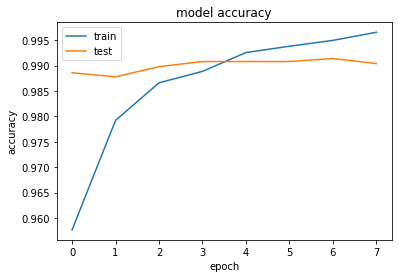

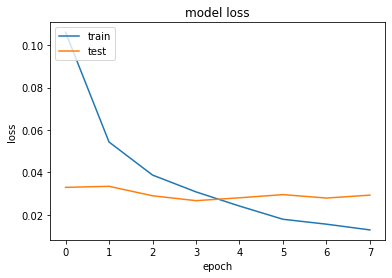

In [15]:
plot_history(history1)

In [16]:
model_fine1.save(model_file_tune1)

In [17]:
test_image(model_fine1, image_size)

This image is 0.0244 percent cat and 99.9756 percent dog.


In [20]:
%%time
generate_submission(keras.models.load_model(model_file_tune1), image_size, '1')

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
Wall time: 10min 52s


fine tuning cross 2

In [18]:
input_shape = image_size + (3,)
base_model = tf.keras.applications.ResNet101V2(input_shape=input_shape,
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False

model_fine2 = make_model(input_shape=input_shape, num_classes=2)
model_fine2.load_weights(model_file2)

base_model.trainable = True

model_fine2.compile(
    optimizer=keras.optimizers.Adam(1e-5),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

In [19]:
history2 = model_fine2.fit(train_ds2, epochs=epochs, callbacks=callbacks, validation_data=val_ds2)

Epoch 1/8
625/625 [==============================] - 236s 366ms/step - loss: 0.1309 - accuracy: 0.9452 - val_loss: 0.0352 - val_accuracy: 0.9868
Epoch 2/8
625/625 [==============================] - 238s 380ms/step - loss: 0.0567 - accuracy: 0.9772 - val_loss: 0.0281 - val_accuracy: 0.9902
Epoch 3/8
625/625 [==============================] - 276s 442ms/step - loss: 0.0417 - accuracy: 0.9842 - val_loss: 0.0248 - val_accuracy: 0.9916
Epoch 4/8
625/625 [==============================] - 239s 382ms/step - loss: 0.0289 - accuracy: 0.9900 - val_loss: 0.0233 - val_accuracy: 0.9930
Epoch 5/8
625/625 [==============================] - 282s 451ms/step - loss: 0.0236 - accuracy: 0.9914 - val_loss: 0.0240 - val_accuracy: 0.9928
Epoch 6/8
625/625 [==============================] - 279s 447ms/step - loss: 0.0169 - accuracy: 0.9938 - val_loss: 0.0246 - val_accuracy: 0.9924
Epoch 7/8
625/625 [==============================] - 298s 476ms/step - loss: 0.0176 - accuracy: 0.9938 - val_loss: 0.0248 - val_ac

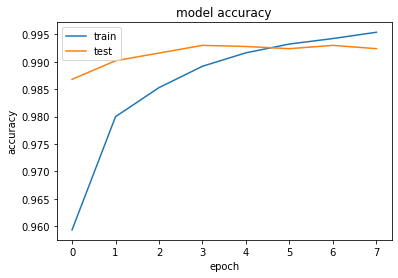

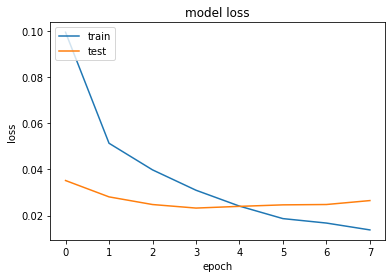

In [20]:
plot_history(history2)

In [21]:
model_fine2.save(model_file_tune2)

In [22]:
test_image(model_fine2, image_size)

This image is 0.0213 percent cat and 99.9787 percent dog.


In [21]:
%%time
generate_submission(keras.models.load_model(model_file_tune2), image_size, '2')

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
Wall time: 8min 54s


fine tuning cross 3

In [23]:
input_shape = image_size + (3,)
base_model = tf.keras.applications.ResNet101V2(input_shape=input_shape,
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False

model_fine3 = make_model(input_shape=input_shape, num_classes=2)
model_fine3.load_weights(model_file3)

base_model.trainable = True

model_fine3.compile(
    optimizer=keras.optimizers.Adam(1e-5),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

In [24]:
history3 = model_fine3.fit(train_ds3, epochs=epochs, callbacks=callbacks, validation_data=val_ds3)

Epoch 1/8
625/625 [==============================] - 266s 416ms/step - loss: 0.1431 - accuracy: 0.9414 - val_loss: 0.0344 - val_accuracy: 0.9896
Epoch 2/8
625/625 [==============================] - 268s 428ms/step - loss: 0.0534 - accuracy: 0.9791 - val_loss: 0.0324 - val_accuracy: 0.9898
Epoch 3/8
625/625 [==============================] - 282s 452ms/step - loss: 0.0375 - accuracy: 0.9853 - val_loss: 0.0291 - val_accuracy: 0.9906
Epoch 4/8
625/625 [==============================] - 284s 455ms/step - loss: 0.0329 - accuracy: 0.9878 - val_loss: 0.0320 - val_accuracy: 0.9894
Epoch 5/8
625/625 [==============================] - 277s 444ms/step - loss: 0.0270 - accuracy: 0.9905 - val_loss: 0.0294 - val_accuracy: 0.9910
Epoch 6/8
625/625 [==============================] - 277s 443ms/step - loss: 0.0181 - accuracy: 0.9932 - val_loss: 0.0306 - val_accuracy: 0.9910
Epoch 7/8
625/625 [==============================] - 275s 440ms/step - loss: 0.0166 - accuracy: 0.9937 - val_loss: 0.0310 - val_ac

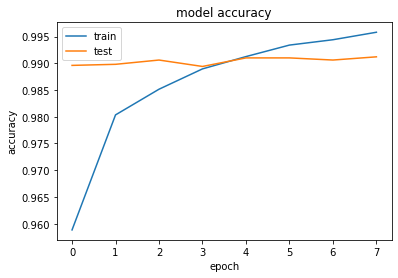

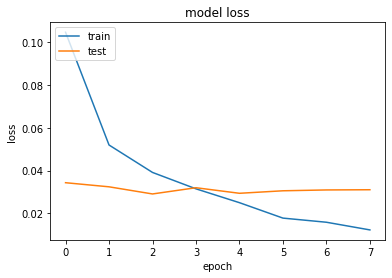

In [25]:
plot_history(history3)

In [26]:
model_fine3.save(model_file_tune3)

In [27]:
test_image(model_fine3, image_size)

This image is 0.0051 percent cat and 99.9949 percent dog.


In [22]:
%%time
generate_submission(keras.models.load_model(model_file_tune3), image_size, '3')

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
Wall time: 8min 58s


fine tuning cross 4

In [28]:
input_shape = image_size + (3,)
base_model = tf.keras.applications.ResNet101V2(input_shape=input_shape,
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False

model_fine4 = make_model(input_shape=input_shape, num_classes=2)
model_fine4.load_weights(model_file4)

base_model.trainable = True

model_fine4.compile(
    optimizer=keras.optimizers.Adam(1e-5),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

In [29]:
history4 = model_fine4.fit(train_ds4, epochs=epochs, callbacks=callbacks, validation_data=val_ds4)

Epoch 1/8
625/625 [==============================] - 272s 424ms/step - loss: 0.1490 - accuracy: 0.9382 - val_loss: 0.0340 - val_accuracy: 0.9866
Epoch 2/8
625/625 [==============================] - 269s 430ms/step - loss: 0.0511 - accuracy: 0.9827 - val_loss: 0.0303 - val_accuracy: 0.9878
Epoch 3/8
625/625 [==============================] - 276s 442ms/step - loss: 0.0381 - accuracy: 0.9866 - val_loss: 0.0284 - val_accuracy: 0.9892
Epoch 4/8
625/625 [==============================] - 282s 452ms/step - loss: 0.0334 - accuracy: 0.9886 - val_loss: 0.0263 - val_accuracy: 0.9920
Epoch 5/8
625/625 [==============================] - 269s 431ms/step - loss: 0.0208 - accuracy: 0.9924 - val_loss: 0.0283 - val_accuracy: 0.9904
Epoch 6/8
625/625 [==============================] - 320s 512ms/step - loss: 0.0219 - accuracy: 0.9930 - val_loss: 0.0255 - val_accuracy: 0.9916
Epoch 7/8
625/625 [==============================] - 265s 424ms/step - loss: 0.0142 - accuracy: 0.9954 - val_loss: 0.0255 - val_ac

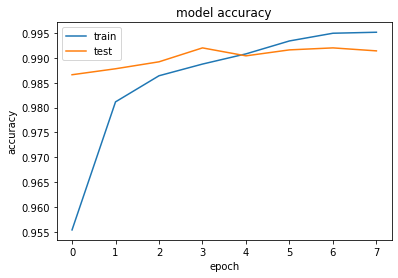

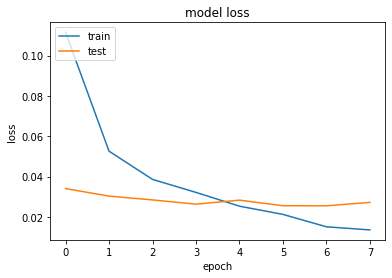

In [30]:
plot_history(history4)

In [31]:
model_fine4.save(model_file_tune4)

In [32]:
test_image(model_fine4, image_size)

This image is 0.3284 percent cat and 99.6716 percent dog.


In [23]:
%%time
generate_submission(keras.models.load_model(model_file_tune4), image_size, '4')

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
Wall time: 9min 19s


fine tuning cross 5

In [15]:
input_shape = image_size + (3,)
base_model = tf.keras.applications.ResNet101V2(input_shape=input_shape,
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False

model_fine5 = make_model(input_shape=input_shape, num_classes=2)
model_fine5.load_weights(model_file5)

base_model.trainable = True

model_fine5.compile(
    optimizer=keras.optimizers.Adam(1e-5),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

In [16]:
history5 = model_fine5.fit(train_ds5, epochs=epochs, callbacks=callbacks, validation_data=val_ds5)

Epoch 1/8
625/625 [==============================] - 243s 372ms/step - loss: 0.1455 - accuracy: 0.9412 - val_loss: 0.0337 - val_accuracy: 0.9872
Epoch 2/8
625/625 [==============================] - 235s 375ms/step - loss: 0.0528 - accuracy: 0.9812 - val_loss: 0.0292 - val_accuracy: 0.9888
Epoch 3/8
625/625 [==============================] - 236s 378ms/step - loss: 0.0434 - accuracy: 0.9849 - val_loss: 0.0279 - val_accuracy: 0.9896
Epoch 4/8
625/625 [==============================] - 239s 383ms/step - loss: 0.0281 - accuracy: 0.9909 - val_loss: 0.0258 - val_accuracy: 0.9902
Epoch 5/8
625/625 [==============================] - 241s 386ms/step - loss: 0.0268 - accuracy: 0.9905 - val_loss: 0.0266 - val_accuracy: 0.9910
Epoch 6/8
625/625 [==============================] - 253s 404ms/step - loss: 0.0185 - accuracy: 0.9934 - val_loss: 0.0237 - val_accuracy: 0.9918
Epoch 7/8
625/625 [==============================] - 253s 405ms/step - loss: 0.0150 - accuracy: 0.9954 - val_loss: 0.0286 - val_ac

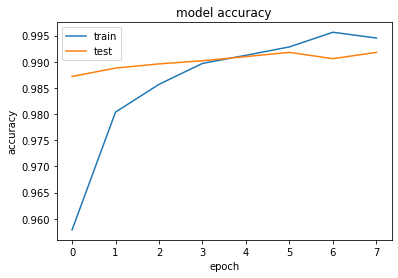

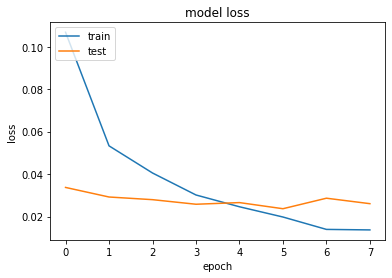

In [17]:
plot_history(history5)

In [18]:
model_fine5.save(model_file_tune5)

In [19]:
test_image(model_fine5, image_size)

This image is 0.0006 percent cat and 99.9994 percent dog.


In [24]:
%%time
generate_submission(keras.models.load_model(model_file_tune5), image_size, '5')

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
Wall time: 8min 50s


combine cross

In [3]:
dfc1 = pd.read_csv('cat and dog tf submission 009a-1.csv')
dfc2 = pd.read_csv('cat and dog tf submission 009a-2.csv')
dfc3 = pd.read_csv('cat and dog tf submission 009a-3.csv')
dfc4 = pd.read_csv('cat and dog tf submission 009a-4.csv')
dfc5 = pd.read_csv('cat and dog tf submission 009a-5.csv')

dfc2.drop('id', axis=1, inplace=True)
dfc3.drop('id', axis=1, inplace=True)
dfc4.drop('id', axis=1, inplace=True)
dfc5.drop('id', axis=1, inplace=True)

#set label
dfc1.columns = ['id', 'label1']
dfc2.columns = ['label2']
dfc3.columns = ['label3']
dfc4.columns = ['label4']
dfc5.columns = ['label5']

In [26]:
dfc = pd.concat([dfc1, dfc2, dfc3, dfc4, dfc5], axis=1)

In [27]:
dfc

,id,label1,label2,label3,label4,label5
0,1,9.999938e-01,9.999970e-01,9.999961e-01,9.999973e-01,9.999989e-01
1,2,9.999962e-01,9.999999e-01,9.999932e-01,9.999994e-01,9.999968e-01
2,3,9.999923e-01,9.999976e-01,9.999912e-01,9.999887e-01,9.999985e-01
3,4,9.999920e-01,9.999912e-01,9.999914e-01,9.999427e-01,9.999915e-01
4,5,6.936430e-07,7.805673e-09,1.235173e-07,7.325010e-08,2.033479e-07
...,...,...,...,...,...,...
12495,12496,1.821829e-06,4.111671e-07,1.048836e-06,1.483472e-07,1.134502e-07
12496,12497,1.184081e-06,2.466871e-07,8.965359e-09,7.231494e-10,6.701050e-07
12497,12498,9.999930e-01,9.999918e-01,9.999529e-01,9.999778e-01,9.999775e-01
12498,12499,9.999996e-01,9.999987e-01,9.999993e-01,9.999975e-01,9.999996e-01


In [28]:
#calc avg
dfavg = dfc[['label1', 'label2', 'label3', 'label4', 'label5']].mean(axis=1).to_frame()
dfavg.columns = ['avg']
dfc = pd.concat([dfc, dfavg], axis=1)
dfc['label'] = 0

In [29]:
#g
for i, row in dfc.iterrows():
    #print(i)
    avg = dfc['avg'][i]
    if (avg < 0.5):
        #print('a')
        x = dfc.iloc[i][['label1', 'label2', 'label3', 'label4', 'label5']].min()
        dfc.loc[i,'label'] = x
    else:
        #print('b')
        x = dfc.iloc[i][['label1', 'label2', 'label3', 'label4', 'label5']].max()
        #print(x)
        dfc.loc[i,'label'] = x

dfc[['id', 'label']].to_csv('E:/jupyter-notebook/jupyter-notebook/tf24/learn/cat and dog tf submission ' + file_version_num + '-g.csv', index=False)

In [31]:
#g1
for i, row in dfc.iterrows():
    #print(i)
    avg = dfc['avg'][i]
    dfc.loc[i,'label'] = avg

dfc[['id', 'label']].to_csv('E:/jupyter-notebook/jupyter-notebook/tf24/learn/cat and dog tf submission ' + file_version_num + '-g1.csv', index=False)

In [ ]:
#g2
diluar (avg+sd) dan (avg-sd)

In [30]:
#g4
for i, row in dfc.iterrows():
    #print(i)
    avg = dfc['avg'][i]
    xmin = dfc.iloc[i][['label1', 'label2', 'label3', 'label4', 'label5']].min()
    xmax = dfc.iloc[i][['label1', 'label2', 'label3', 'label4', 'label5']].max()
    td = 0
    tc = 0
    if (dfc['label1'][i] > 0.5):
        td = td + 1
    else:
        tc = tc + 1

    if (dfc['label2'][i] > 0.5):
        td = td + 1
    else:
        tc = tc + 1

    if (dfc['label3'][i] > 0.5):
        td = td + 1
    else:
        tc = tc + 1

    if (dfc['label4'][i] > 0.5):
        td = td + 1
    else:
        tc = tc + 1

    if (dfc['label5'][i] > 0.5):
        td = td + 1
    else:
        tc = tc + 1

    if (td > tc):
        dfc.loc[i,'label'] = xmax
    else:
        dfc.loc[i,'label'] = xmin

dfc[['id', 'label']].to_csv('E:/jupyter-notebook/jupyter-notebook/tf24/learn/cat and dog tf submission ' + file_version_num + '-g4.csv', index=False)

plot histogram

<AxesSubplot:>

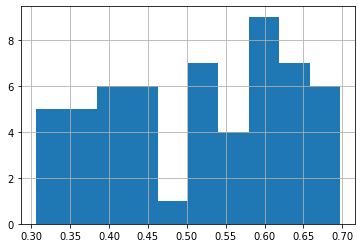

In [31]:
dfc1[(dfc1['label1'] > 0.3) & (dfc1['label1'] < 0.7)]['label1'].hist()

In [43]:
dfc1[(dfc1['label1'] > 0.3) & (dfc1['label1'] < 0.7)]['label1'].describe()

count    56.000000
mean      0.514950
std       0.117460
min       0.305910
25%       0.417666
50%       0.533904
75%       0.614430
max       0.697269
Name: label1, dtype: float64

array([[<AxesSubplot:title={'center':'label2'}>]], dtype=object)

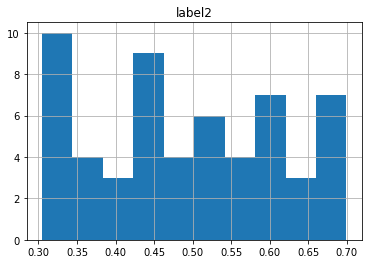

In [30]:
dfc2[(dfc2['label2'] > 0.3) & (dfc2['label2'] < 0.7)].hist()

In [44]:
dfc2[(dfc2['label2'] > 0.3) & (dfc2['label2'] < 0.7)]['label2'].describe()

count    57.000000
mean      0.492435
std       0.122050
min       0.304700
25%       0.394048
50%       0.483213
75%       0.607501
max       0.699476
Name: label2, dtype: float64

array([[<AxesSubplot:title={'center':'label3'}>]], dtype=object)

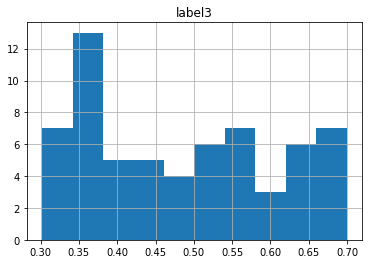

In [29]:
dfc3[(dfc3['label3'] > 0.3) & (dfc3['label3'] < 0.7)].hist()

In [45]:
dfc3[(dfc3['label3'] > 0.3) & (dfc3['label3'] < 0.7)]['label3'].describe()

count    63.000000
mean      0.483761
std       0.123735
min       0.302124
25%       0.365795
50%       0.481547
75%       0.583655
max       0.699192
Name: label3, dtype: float64

array([[<AxesSubplot:title={'center':'label4'}>]], dtype=object)

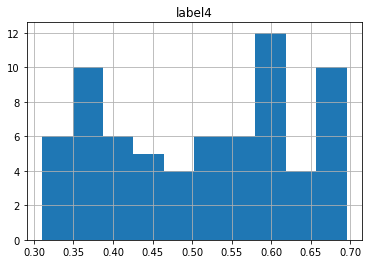

In [28]:
dfc4[(dfc4['label4'] > 0.3) & (dfc4['label4'] < 0.7)].hist()

In [46]:
dfc4[(dfc4['label4'] > 0.3) & (dfc4['label4'] < 0.7)]['label4'].describe()

count    69.000000
mean      0.512577
std       0.117931
min       0.310400
25%       0.403525
50%       0.523563
75%       0.601003
max       0.695272
Name: label4, dtype: float64

array([[<AxesSubplot:title={'center':'label5'}>]], dtype=object)

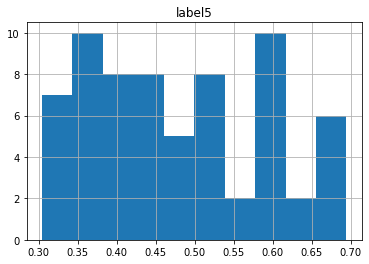

In [27]:
dfc5[(dfc5['label5'] > 0.3) & (dfc5['label5'] < 0.7)].hist()

In [47]:
dfc5[(dfc5['label5'] > 0.3) & (dfc5['label5'] < 0.7)]['label5'].describe()

count    66.000000
mean      0.476533
std       0.112164
min       0.304315
25%       0.381926
50%       0.459673
75%       0.580264
max       0.694394
Name: label5, dtype: float64